This notebook creates plots of the LSA context vectors of three highly ambiguous words (calf, pupil and mole; selected from stimuli list of Rodd et al., 2002).

In [1]:
# # Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install umap-learn

In [2]:
# Import used modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
%matplotlib inline
sns.set()

C:\Users\bbcev\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# Set working directory 
wd = os.chdir("..")
os.getcwd()

'C:\\Users\\bbcev\\Dropbox (Royal Holloway)\\PhD\\Research\\S1_SemanticDiversity_LSA\\_condiv\\Cevoli2020_SemanticDiversity'

In [4]:
# Import data
dtm = np.loadtxt("data\documentTermMatrix.npz", delimiter=",")
wordDocList = pd.read_csv("data\wordDocList.csv")
bnc_meta = pd.read_csv("data\BNC_MetaInfo.csv", index_col=0)
docInfo = pd.read_csv("data\documentContextInfo.csv", index_col=0)
docInfo["DocID"] = [row[0] for row in docInfo["ContextID"].str.split("_")]
docInfo["ContextNumber"] = [row[1] for row in docInfo["ContextID"].str.split("_")]
bnc_info = pd.merge(docInfo[["ContextID","DocID","ContextNumber","contextIndex"]], bnc_meta, left_on="DocID", right_on="id", how="outer")
bnc_info.head()

,ContextID,DocID,ContextNumber,contextIndex,id,title,n_words,n_tokens,n_w,n_c,...,difficulty,medium,publication_place,sampling_type,circulation,audience_sex,availability,mode,derived_type,genre
0,B76_1,B76,1,0.0,B76,New Scientist. Sample containing about 40793 w...,40564.0,45947.0,40965.0,4982.0,...,medium,periodical,UK_south,unknown,high,mixed,cleared,written,prose,W:non_ac:nat_science
1,B76_2,B76,2,1.0,B76,New Scientist. Sample containing about 40793 w...,40564.0,45947.0,40965.0,4982.0,...,medium,periodical,UK_south,unknown,high,mixed,cleared,written,prose,W:non_ac:nat_science
2,B76_3,B76,3,2.0,B76,New Scientist. Sample containing about 40793 w...,40564.0,45947.0,40965.0,4982.0,...,medium,periodical,UK_south,unknown,high,mixed,cleared,written,prose,W:non_ac:nat_science
3,B76_4,B76,4,3.0,B76,New Scientist. Sample containing about 40793 w...,40564.0,45947.0,40965.0,4982.0,...,medium,periodical,UK_south,unknown,high,mixed,cleared,written,prose,W:non_ac:nat_science
4,B76_5,B76,5,4.0,B76,New Scientist. Sample containing about 40793 w...,40564.0,45947.0,40965.0,4982.0,...,medium,periodical,UK_south,unknown,high,mixed,cleared,written,prose,W:non_ac:nat_science


##### Calf

In [5]:
outputDir = "figures\SemanticDiversityProcedure_LSAbasedApproach_VisualExploration_AmbiguityStudyCase_"
sns.set(rc={'figure.figsize':(20,12)})

In [6]:
word = "calf"
calfSubset = pd.read_csv("data\contextSample_calf.csv")
calfSubset["DocID"] = [s[0] for s in calfSubset["ContextID"].str.split("_")]
#subset context vectors 
cIndex = wordDocList[wordDocList["Word"]==word]["Docs"]
contextVectors = dtm[np.array(cIndex),:]
corpusInfo_subset = bnc_info[bnc_info["contextIndex"].isin(list(cIndex))]
#reduce dimensionality with TSNE
contextVectors_TSNE = TSNE(n_components=2).fit_transform(contextVectors)
corpusInfo_subset.reset_index(inplace=True,drop=True)
corpusInfo_subset = pd.concat([corpusInfo_subset, pd.DataFrame(contextVectors_TSNE, columns=["X_TSNE","Y_TSNE"])], axis=1)
corpusInfo_subset = pd.merge(corpusInfo_subset, calfSubset[["ContextID", "targetMeaning"]], left_on="ContextID", right_on="ContextID", how="left")
corpusInfo_subset.rename(columns={'targetMeaning': 'Meaning'}, inplace=True)
corpusInfo_subset["Meaning"].fillna("unsampled", inplace=True)
corpusInfo_subset["Meaning"] = corpusInfo_subset["Meaning"].apply(lambda x: "other" if x not in ["animal","body","unsampled"] else x)
corpusInfo_subset["Condition"] = "ManualLabels"
random = corpusInfo_subset[corpusInfo_subset.columns]
random['Meaning'] = np.random.permutation(random["Meaning"].values)
random["Condition"] = "RandomLabels"
plotSubset = corpusInfo_subset.append(random)
plotSubset['Meaning'] = plotSubset['Meaning'].astype('category')
plotSubset

,ContextID,DocID,ContextNumber,contextIndex,id,title,n_words,n_tokens,n_w,n_c,...,circulation,audience_sex,availability,mode,derived_type,genre,X_TSNE,Y_TSNE,Meaning,Condition
0,B72_13,B72,13,121.0,B72,New Scientist. Sample containing about 43448 w...,43174.0,48839.0,43668.0,5171.0,...,high,mixed,cleared,written,prose,W:non_ac:nat_science,-1.994619,26.496117,animal,ManualLabels
1,B7H_11,B7H,11,171.0,B7H,New Scientist. Sample containing about 43200 w...,42942.0,48753.0,43424.0,5329.0,...,high,mixed,cleared,written,prose,W:non_ac:nat_science,4.800833,19.919327,unsampled,ManualLabels
2,B7K_16,B7K,16,396.0,B7K,New Scientist. Sample containing about 38427 w...,38248.0,43385.0,38615.0,4770.0,...,high,mixed,cleared,written,prose,W:non_ac:nat_science,-11.591940,9.627300,unsampled,ManualLabels
3,B1X_18,B1X,18,537.0,B1X,The killing frost. Sample containing about 395...,40049.0,48667.0,40335.0,8332.0,...,high,mixed,cleared,written,fiction,W:fict:prose,8.358125,-4.155008,unsampled,ManualLabels
4,B1J_13,B1J,13,591.0,B1J,In good faith. Sample containing about 39422 w...,39307.0,43806.0,39630.0,4176.0,...,medium,mixed,cleared,written,prose,W:religion,-4.073876,0.769530,animal,ManualLabels
5,B1J_14,B1J,14,592.0,B1J,In good faith. Sample containing about 39422 w...,39307.0,43806.0,39630.0,4176.0,...,medium,mixed,cleared,written,prose,W:religion,-4.113400,0.728200,unsampled,ManualLabels
6,B10_16,B10,16,634.0,B10,Discipline: a positive guide for parents. Samp...,38382.0,44696.0,38830.0,5866.0,...,medium,mixed,cleared,written,prose,W:non_ac:soc_science,11.804090,19.503233,body,ManualLabels
7,B1H_3,B1H,3,814.0,B1H,Decisions in geography: the United Kingdom. Sa...,40087.0,45320.0,40321.0,4999.0,...,medium,mixed,cleared,written,prose,W:non_ac:soc_science,-20.038141,-1.908804,animal,ManualLabels
8,B1H_5,B1H,5,816.0,B1H,Decisions in geography: the United Kingdom. Sa...,40087.0,45320.0,40321.0,4999.0,...,medium,mixed,cleared,written,prose,W:non_ac:soc_science,-18.658504,0.533934,animal,ManualLabels
9,B1H_9,B1H,9,820.0,B1H,Decisions in geography: the United Kingdom. Sa...,40087.0,45320.0,40321.0,4999.0,...,medium,mixed,cleared,written,prose,W:non_ac:soc_science,-18.593506,0.963194,unsampled,ManualLabels


In [7]:
#get variance ratio scores
for condition in plotSubset.Condition.unique():
    print(condition)
    print(round(metrics.calinski_harabasz_score(contextVectors, plotSubset[plotSubset["Condition"]==condition]["Meaning"]),2))

ManualLabels
3.28
RandomLabels
1.09


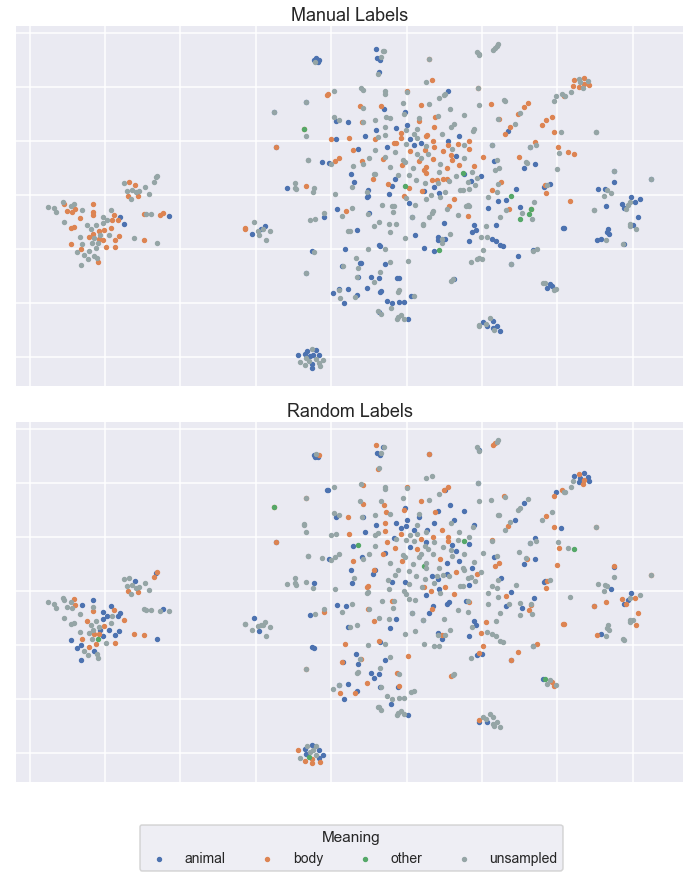

In [8]:
#plot
sns.set_context("talk")
sns.set_palette(sns.color_palette(["b","#dd8452","g","#95a5a6"]))
with sns.axes_style("darkgrid"):
    g = sns.FacetGrid(plotSubset, row="Condition", hue="Meaning",
                     height=6, aspect=1.8, legend_out=False)
g.map(plt.scatter, "Y_TSNE", "X_TSNE", s=15);
g.set_axis_labels("", "");
g.add_legend(title="Meaning", fontsize=14,
             bbox_to_anchor=(0.83, -1.2), ncol=len(plotSubset.Meaning.unique()), 
             label_order = sorted(list(plotSubset.Meaning.unique())))
g.despine(left=True, bottom=True)
g.set(xticklabels=[], yticklabels=[])
g.fig.subplots_adjust(wspace=.02, hspace=.1);
for ax, title in zip(g.axes.flat, ['Manual Labels', 'Random Labels']):
    ax.set_title(title)
g.savefig(outputDir+word+".png", bbox_inches='tight')

##### Pupil

In [9]:
word = "pupil"
pupilSubset = pd.read_csv("data\contextSample_pupil.csv")
#subset target word's context vectors 
cIndex = wordDocList[wordDocList["Word"]==word]["Docs"]
contextVectors = dtm[np.array(cIndex),:]
corpusInfo_subset = bnc_info[bnc_info["contextIndex"].isin(list(cIndex))]
#reduce dimensionality
contextVectors_TSNE = TSNE(n_components=2).fit_transform(contextVectors)
corpusInfo_subset.reset_index(inplace=True,drop=True)
corpusInfo_subset = pd.concat([corpusInfo_subset, pd.DataFrame(contextVectors_TSNE, columns=["X_TSNE","Y_TSNE"])], axis=1)
corpusInfo_subset = pd.merge(corpusInfo_subset, pupilSubset[["ContextID", "targetMeaning"]], left_on="ContextID", right_on="ContextID", how="left")
corpusInfo_subset = corpusInfo_subset.drop_duplicates(subset="contextIndex", keep="first")
corpusInfo_subset.rename(columns={'targetMeaning': 'Meaning'}, inplace=True)
corpusInfo_subset["Meaning"].fillna("unsampled", inplace=True)
corpusInfo_subset["Meaning"] = corpusInfo_subset["Meaning"].apply(lambda x: "other" if x not in ["eye","student","unsampled"] else x)
corpusInfo_subset["Condition"] = "ManualLabels"
random = corpusInfo_subset[corpusInfo_subset.columns]
random['Meaning'] = np.random.permutation(random["Meaning"].values)
random["Condition"] = "RandomLabels"
plotSubset = corpusInfo_subset.append(random)
plotSubset['Meaning'] = plotSubset['Meaning'].astype('category')
plotSubset

,ContextID,DocID,ContextNumber,contextIndex,id,title,n_words,n_tokens,n_w,n_c,...,circulation,audience_sex,availability,mode,derived_type,genre,X_TSNE,Y_TSNE,Meaning,Condition
0,B7G_15,B7G,15,36.0,B7G,New Scientist. Sample containing about 52148 w...,51868.0,58595.0,52379.0,6216.0,...,high,mixed,cleared,written,prose,W:non_ac:nat_science,-18.340017,10.469258,unsampled,ManualLabels
1,B7G_19,B7G,19,40.0,B7G,New Scientist. Sample containing about 52148 w...,51868.0,58595.0,52379.0,6216.0,...,high,mixed,cleared,written,prose,W:non_ac:nat_science,6.820299,-18.812824,student,ManualLabels
2,B7G_24,B7G,24,45.0,B7G,New Scientist. Sample containing about 52148 w...,51868.0,58595.0,52379.0,6216.0,...,high,mixed,cleared,written,prose,W:non_ac:nat_science,-13.306792,0.288804,student,ManualLabels
3,B74_19,B74,19,74.0,B74,New Scientist. Sample containing about 37460 w...,37247.0,42103.0,37609.0,4494.0,...,high,mixed,cleared,written,prose,W:non_ac:nat_science,-0.907141,2.373798,student,ManualLabels
4,B72_3,B72,3,111.0,B72,New Scientist. Sample containing about 43448 w...,43174.0,48839.0,43668.0,5171.0,...,high,mixed,cleared,written,prose,W:non_ac:nat_science,0.450217,4.502695,unsampled,ManualLabels
5,B72_12,B72,12,120.0,B72,New Scientist. Sample containing about 43448 w...,43174.0,48839.0,43668.0,5171.0,...,high,mixed,cleared,written,prose,W:non_ac:nat_science,5.469337,-0.347284,unsampled,ManualLabels
6,B7J_14,B7J,14,197.0,B7J,New Scientist. Sample containing about 47782 w...,47488.0,53637.0,47967.0,5670.0,...,high,mixed,cleared,written,prose,W:non_ac:nat_science,-2.310847,-2.528955,student,ManualLabels
7,B7L_2,B7L,2,210.0,B7L,New Scientist. Sample containing about 49863 w...,49671.0,56528.0,50171.0,6357.0,...,high,mixed,cleared,written,prose,W:non_ac:nat_science,-17.818653,11.684830,unsampled,ManualLabels
8,B7L_23,B7L,23,231.0,B7L,New Scientist. Sample containing about 49863 w...,49671.0,56528.0,50171.0,6357.0,...,high,mixed,cleared,written,prose,W:non_ac:nat_science,-19.052078,10.909776,unsampled,ManualLabels
9,B7M_1,B7M,1,278.0,B7M,New Scientist. Sample containing about 42910 w...,42634.0,47967.0,43095.0,4872.0,...,high,mixed,cleared,written,prose,W:non_ac:nat_science,0.775575,4.007309,student,ManualLabels


In [10]:
#get variance ratio scores
for condition in plotSubset.Condition.unique():
    print(condition)
    print(round(metrics.calinski_harabasz_score(contextVectors, plotSubset[plotSubset["Condition"]==condition]["Meaning"]),2))

ManualLabels
4.43
RandomLabels
1.24


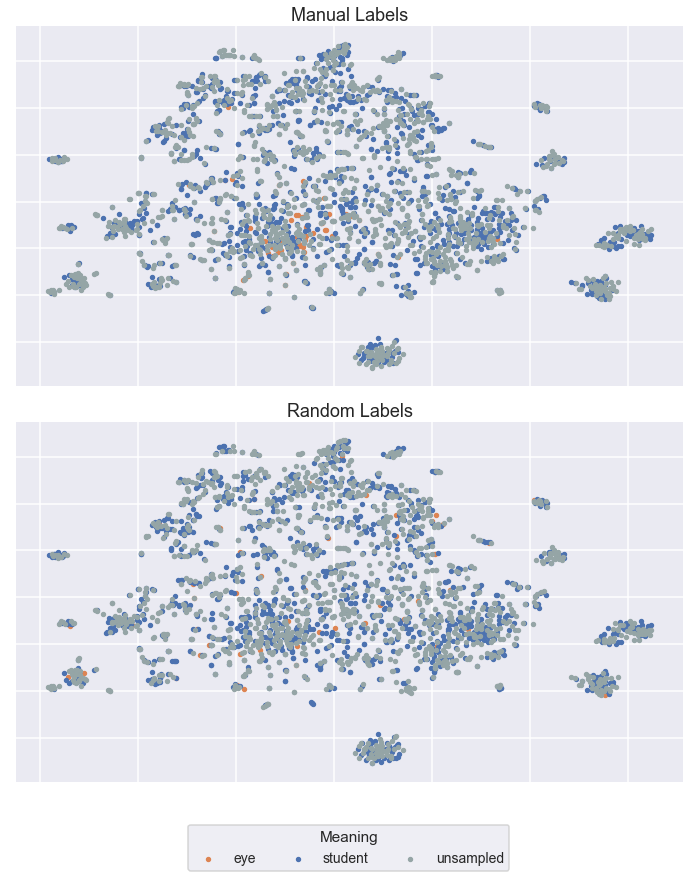

In [11]:
sns.set_context("talk")
sns.set_palette(sns.color_palette(["#dd8452","b","#95a5a6"]))
with sns.axes_style("darkgrid"):
    g = sns.FacetGrid(plotSubset, row="Condition", hue="Meaning",
                     height=6, aspect=1.8, legend_out=False)
g.map(plt.scatter, "Y_TSNE", "X_TSNE", s=15);
g.set_axis_labels("", "");
g.add_legend(title="Meaning", fontsize=14,
             bbox_to_anchor=(0.75, -1.2), ncol=len(plotSubset.Meaning.unique()), 
             label_order = sorted(list(plotSubset.Meaning.unique())))
g.despine(left=True, bottom=True)
g.set(xticklabels=[], yticklabels=[])
g.fig.subplots_adjust(wspace=.02, hspace=.1);
for ax, title in zip(g.axes.flat, ['Manual Labels', 'Random Labels']):
    ax.set_title(title)
g.savefig(outputDir+word+".png", bbox_inches='tight')

##### Mole

In [12]:
word = "mole"
moleSubset = pd.read_csv("data\contextSample_mole.csv")
#subset target word's context vectors 
cIndex = wordDocList[wordDocList["Word"]==word]["Docs"]
contextVectors = dtm[np.array(cIndex),:]
corpusInfo_subset = bnc_info[bnc_info["contextIndex"].isin(list(cIndex))]
#reduce dimensionality
contextVectors_TSNE = TSNE(n_components=2).fit_transform(contextVectors)
corpusInfo_subset.reset_index(inplace=True,drop=True)
corpusInfo_subset = pd.concat([corpusInfo_subset, pd.DataFrame(contextVectors_TSNE, columns=["X_TSNE","Y_TSNE"])], axis=1)
corpusInfo_subset = pd.merge(corpusInfo_subset, moleSubset[["ContextID", "targetMeaning"]], left_on="ContextID", right_on="ContextID", how="left")
corpusInfo_subset = corpusInfo_subset.drop_duplicates(subset="contextIndex", keep="first")
corpusInfo_subset["targetMeaning"].fillna("unsampled", inplace=True)
corpusInfo_subset.rename(columns={'targetMeaning': 'Meaning'}, inplace=True)
corpusInfo_subset["Meaning"] = corpusInfo_subset["Meaning"].apply(lambda x: "animal/spy" if x in ["animal","spy"] else x)
corpusInfo_subset["Meaning"] = corpusInfo_subset["Meaning"].apply(lambda x: "other" if x not in ["animal/spy","skin","unsampled"] else x)
corpusInfo_subset["Condition"] = "ManualLabels"
random = corpusInfo_subset[corpusInfo_subset.columns]
random['Meaning'] = np.random.permutation(random["Meaning"].values)
random["Condition"] = "RandomLabels"
plotSubset = corpusInfo_subset.append(random)
plotSubset['Meaning'] = plotSubset['Meaning'].astype('category')
plotSubset

,ContextID,DocID,ContextNumber,contextIndex,id,title,n_words,n_tokens,n_w,n_c,...,circulation,audience_sex,availability,mode,derived_type,genre,X_TSNE,Y_TSNE,Meaning,Condition
0,B7G_15,B7G,15,36.0,B7G,New Scientist. Sample containing about 52148 w...,51868.0,58595.0,52379.0,6216.0,...,high,mixed,cleared,written,prose,W:non_ac:nat_science,-0.317876,5.199953,unsampled,ManualLabels
1,B71_6,B71,6,260.0,B71,New Scientist. Sample containing about 43491 w...,43278.0,49140.0,43728.0,5412.0,...,high,mixed,cleared,written,prose,W:non_ac:nat_science,-15.875044,-5.375711,other,ManualLabels
2,BLX_10,BLX,10,916.0,BLX,Animal watching -- A field guide to animal beh...,36846.0,41361.0,37224.0,4137.0,...,high,mixed,cleared,written,prose,W:non_ac:nat_science,-8.587668,5.334099,animal/spy,ManualLabels
3,BLX_11,BLX,11,917.0,BLX,Animal watching -- A field guide to animal beh...,36846.0,41361.0,37224.0,4137.0,...,high,mixed,cleared,written,prose,W:non_ac:nat_science,-8.556642,5.258681,unsampled,ManualLabels
4,B3K_6,B3K,6,1036.0,B3K,[Tourist information: York]. Sample containing...,37182.0,41915.0,37354.0,4561.0,...,high,mixed,unclaimed,written,misc_published,W:advert,6.592626,1.343434,other,ManualLabels
5,BP8_8,BP8,8,1423.0,BP8,Tales I tell my mother. Sample containing abou...,29629.0,35198.0,29907.0,5291.0,...,medium,female,cleared,written,fiction,W:fict:prose,1.222296,-5.735353,unsampled,ManualLabels
6,B2C_1,B2C,1,1746.0,B2C,"Owls, caves and fossils. Sample containing abo...",38186.0,44003.0,38688.0,5315.0,...,medium,mixed,cleared,written,academic,W:ac:humanities_arts,-10.457732,6.878991,animal/spy,ManualLabels
7,B2C_2,B2C,2,1747.0,B2C,"Owls, caves and fossils. Sample containing abo...",38186.0,44003.0,38688.0,5315.0,...,medium,mixed,cleared,written,academic,W:ac:humanities_arts,-10.727190,7.135170,unsampled,ManualLabels
8,B2C_9,B2C,9,1754.0,B2C,"Owls, caves and fossils. Sample containing abo...",38186.0,44003.0,38688.0,5315.0,...,medium,mixed,cleared,written,academic,W:ac:humanities_arts,-11.944695,8.403708,unsampled,ManualLabels
9,B2C_13,B2C,13,1758.0,B2C,"Owls, caves and fossils. Sample containing abo...",38186.0,44003.0,38688.0,5315.0,...,medium,mixed,cleared,written,academic,W:ac:humanities_arts,-11.427017,7.837502,animal/spy,ManualLabels


In [13]:
#get variance ratio scores
for condition in plotSubset.Condition.unique():
    print(condition)
    print(round(metrics.calinski_harabasz_score(contextVectors, plotSubset[plotSubset["Condition"]==condition]["Meaning"]),2))

ManualLabels
2.08
RandomLabels
1.08


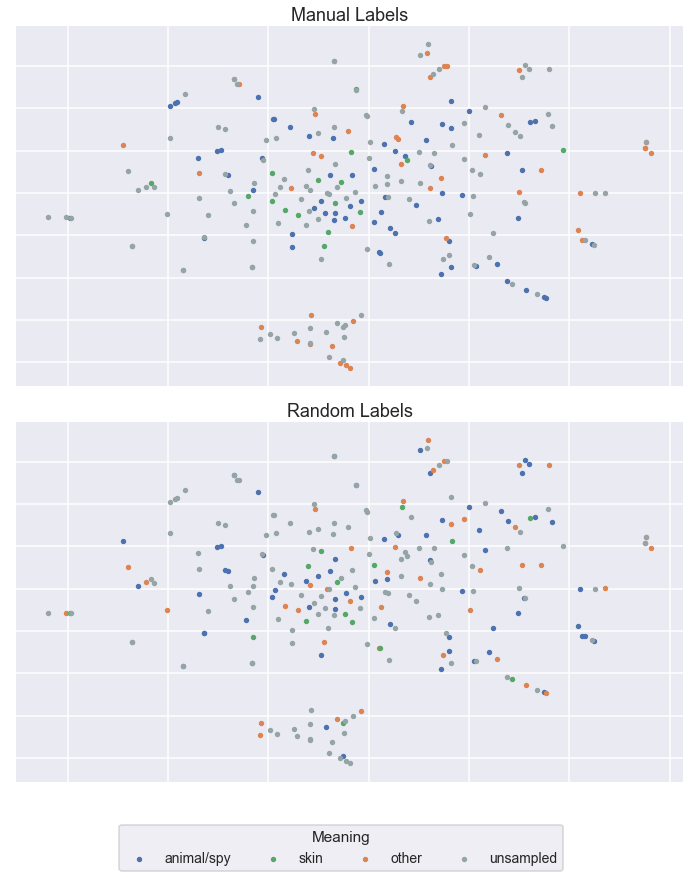

In [14]:
sns.set_context("talk")
sns.set_palette(sns.color_palette(["b","#dd8452","g","#95a5a6"]))
with sns.axes_style("darkgrid"):
    g = sns.FacetGrid(plotSubset, row="Condition", hue="Meaning",
                     height=6, aspect=1.8, legend_out=False)
g.map(plt.scatter, "Y_TSNE", "X_TSNE", s=15);
g.set_axis_labels("", "");
g.add_legend(title="Meaning", fontsize=14,
             bbox_to_anchor=(0.83, -1.2), ncol=len(plotSubset.Meaning.unique()), 
             label_order = ['animal/spy','skin','other','unsampled'])
g.despine(left=True, bottom=True)
g.set(xticklabels=[], yticklabels=[])
g.fig.subplots_adjust(wspace=.02, hspace=.1);
for ax, title in zip(g.axes.flat, ['Manual Labels', 'Random Labels']):
    ax.set_title(title)
g.savefig(outputDir+word+".png", bbox_inches='tight')